<a href="https://colab.research.google.com/github/pinkesh-ai/DL201/blob/main/Patel_DL201_HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()
import os
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from IPython.display import Image, display_svg, SVG
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

!pip install kaggle

     |████████████████████████████████| 727kB 8.3MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 1.2MB 42.8MB/s 
     |████████████████████████████████| 194kB 40.9MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
Mounted at /content/gdrive
Mounted at /content/gdrive


In [ ]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
from dtreeviz.trees import *
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [ ]:
cred_path = Path('/content/gdrive/MyDrive/Colab/Kaggle').expanduser()

if not cred_path.exists():
  cred_path.parent.mkdir(exist_ok=True)
  cred_path.write_text(creds)
  cred_path.chmod(0o600)

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/fastai/house_price/"
%cd /content/gdrive/MyDrive/fastai/house_price/

/content/gdrive/MyDrive/fastai/house_price


In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 861kB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 29.1MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 29.0MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 4.30MB/s]


In [ ]:
ls

In [ ]:
df = pd.read_csv('train.csv', index_col='Id', low_memory=False)
df

FileNotFoundError: ignored

In [ ]:
test_df = pd.read_csv('test.csv', index_col='Id', low_memory=False)
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,...,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,
1461,20,RH,80.0,11622,...,6,2010,WD,Normal
1462,20,RL,81.0,14267,...,6,2010,WD,Normal
1463,60,RL,74.0,13830,...,3,2010,WD,Normal
1464,60,RL,78.0,9978,...,6,2010,WD,Normal
1465,120,RL,43.0,5005,...,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,...,6,2006,WD,Normal
2916,160,RM,21.0,1894,...,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,...,9,2006,WD,Abnorml


In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
df['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

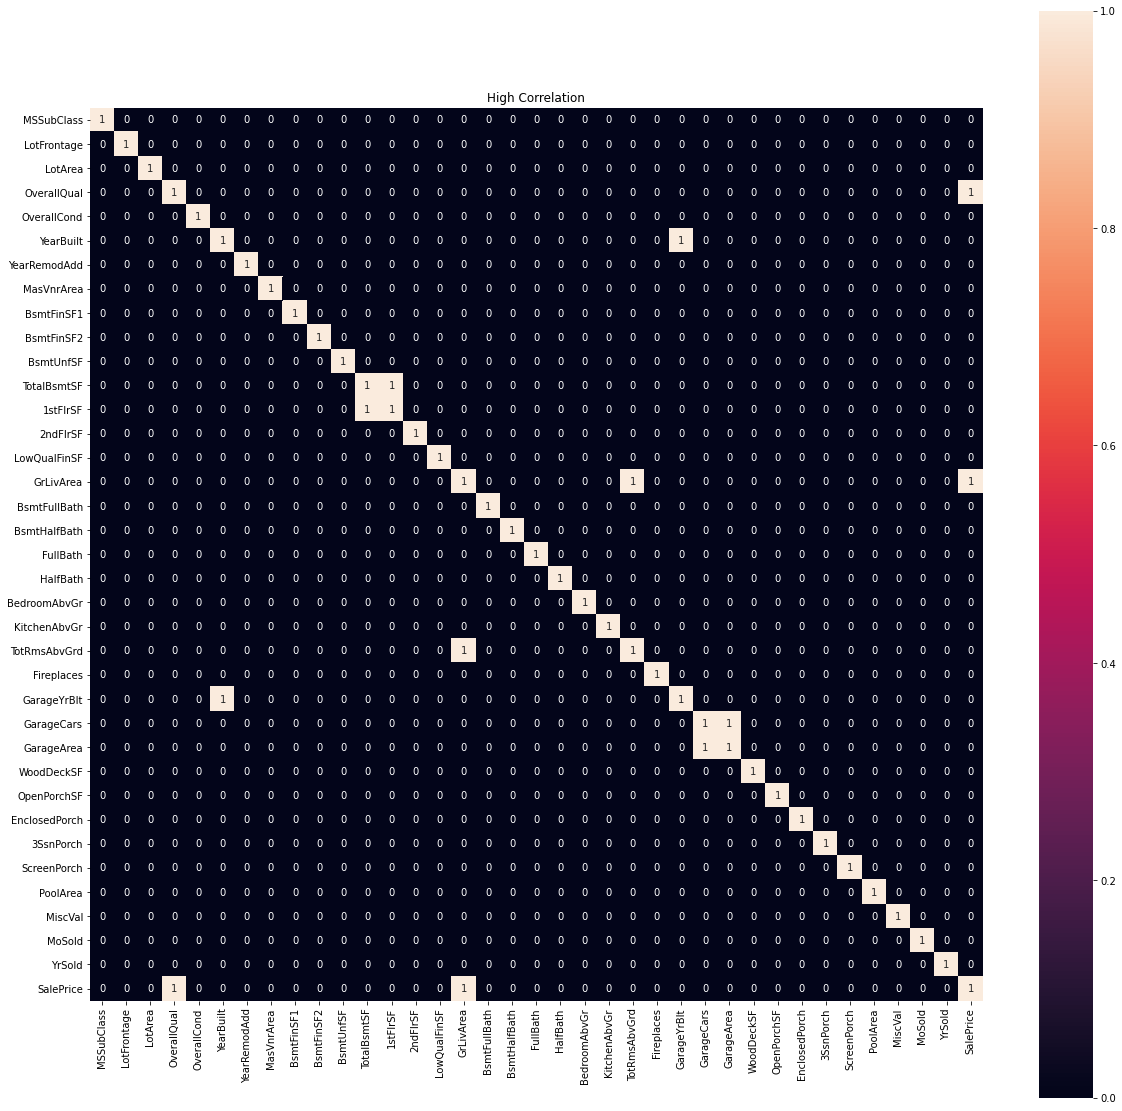

In [ ]:
num_correlation = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.7, annot=True, square=True)
# sns.heatmap(num_correlation , annot=True, square=True)

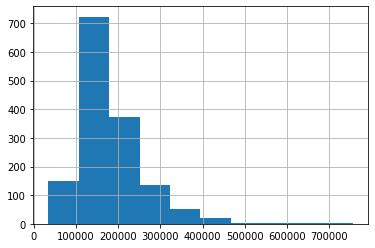

In [ ]:
df['SalePrice'].hist()

In [ ]:
df['SalePrice'] = np.log1p(df['SalePrice'])

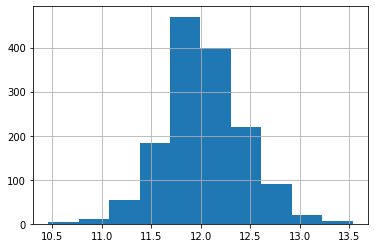

In [ ]:
df['SalePrice'].hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
dep_var = 'SalePrice'

In [ ]:
procs = [Categorify, FillMissing]

In [ ]:
cont, cat = cont_cat_split(df, 1, dep_var=dep_var)

In [ ]:
cont

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
len(cont)

36

In [ ]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
len(cat)

43

In [ ]:
df.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [ ]:
cond = (df.YrSold < 2010)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx), list(valid_idx))

In [ ]:
len(range_of(df))

1460

In [ ]:
len(range_of(df))

1460

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))
splits

((#1168) [1172,1313,1327,29,397,999,1406,219,436,482...],
 (#292) [782,131,414,1350,190,820,1376,1040,1314,305...])

In [ ]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [ ]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [ ]:
len(to.train), len(to.valid)

(1168, 292)

In [ ]:
len(to.train), len(to.valid)

(1285, 175)

In [ ]:
to.show(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1173,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,#na#,Detchd,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,160,35.0,4017,7,5,2006,2007,0.0,0,0,625,625,625,625,0,1250,0,0,2,1,2,1,5,0,2006.0,2,625,0,54,0,0,0,0,0,3,2008,12.054674
1314,RL,Pave,#na#,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,BuiltIn,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,60,108.0,14774,9,5,1999,1999,165.0,0,0,1393,1393,1422,1177,0,2599,0,0,2,1,4,1,10,1,1999.0,3,779,668,30,0,0,0,0,0,5,2010,12.716405
1328,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,Gd,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Ex,Attchd,Unf,TA,TA,Y,#na#,MnPrv,#na#,WD,Normal,False,False,False,20,60.0,6600,5,9,1982,2008,0.0,641,0,175,816,816,0,0,816,0,1,1,0,3,1,5,1,1982.0,1,264,0,0,0,0,0,0,0,10,2008,11.779136


In [ ]:
save_pickle('./train_data_to2.pkl',to)

In [ ]:
with open('./train_data_to2.pkl', 'rb') as f:
    to = pickle.load(f)

In [ ]:
to.train.xs

,MSZoning,Street,Alley,LotShape,...,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,
1173,2,2,2,1,...,0,0,3,2008
1314,4,2,0,1,...,0,0,5,2010
1328,4,2,0,4,...,0,0,10,2008
30,5,2,0,1,...,0,0,5,2008
398,4,2,0,4,...,0,0,7,2007
...,...,...,...,...,...,...,...,...,...
392,4,2,0,1,...,0,0,6,2009
1252,4,2,0,1,...,0,0,3,2006
1202,4,2,0,4,...,0,0,3,2009


In [ ]:
to.train.y

Id
1173    12.054674
1314    12.716405
1328    11.779136
30      11.134604
398     12.040614
          ...    
392     12.278398
1252    12.053801
1202    12.195522
738     12.387981
242     11.612780
Name: SalePrice, Length: 1168, dtype: float32

In [ ]:
to.valid.xs

,MSZoning,Street,Alley,LotShape,...,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,
783,4,2,0,2,...,0,0,6,2009
132,4,2,0,1,...,0,0,7,2009
415,4,2,0,2,...,0,0,12,2008
1351,4,2,0,4,...,0,0,8,2009
191,4,2,0,4,...,0,0,12,2007
...,...,...,...,...,...,...,...,...,...
1225,4,2,0,1,...,0,0,2,2008
401,4,2,0,2,...,0,0,12,2008
99,4,2,0,4,...,0,400,5,2010


In [ ]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [ ]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

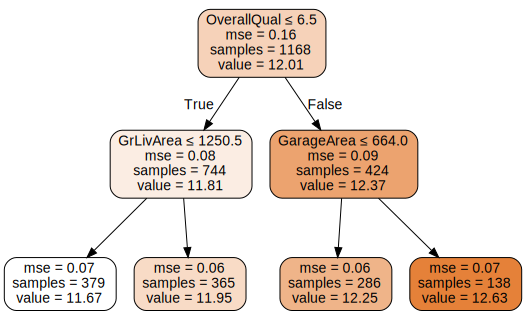

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

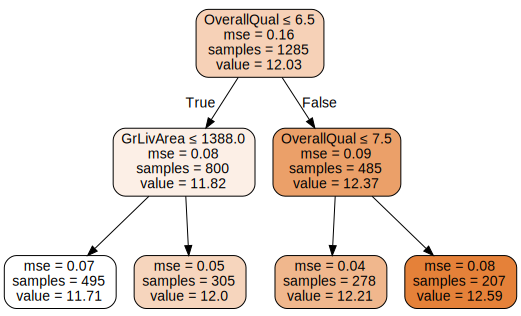

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

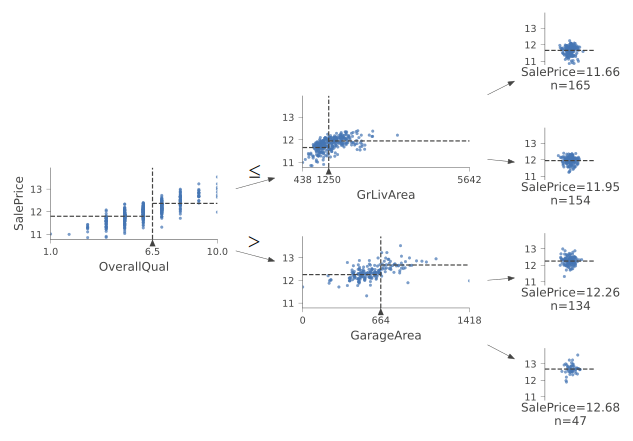

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]

dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [ ]:
# def r_mse(pred,y):
#   return round(math.sqrt(((pred-y)**2).mean()), 6)

In [ ]:
# r_mse(m.predict(xs), y)

In [ ]:
mean_squared_error(y, m.predict(xs), squared=False)

0.2508328646419473

In [ ]:
mean_squared_error(y, m.predict(xs), squared=False)

0.2470483475987381

In [ ]:
mean_squared_error(valid_y, m.predict(valid_xs), squared=False)

0.251359585257031

In [ ]:
mean_squared_error(valid_y, m.predict(valid_xs), squared=False)

0.25967448221047607

In [ ]:
m.get_n_leaves(), len(xs)

(4, 1168)

In [ ]:
def rf(xs, y, n_estimators=40, max_samples=1168,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
def rf(xs, y, n_estimators=40, max_samples=1285,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
m = rf(xs, y);

In [ ]:
m = rf(xs, y);

In [ ]:
mean_squared_error(y, m.predict(xs), squared=False)

0.09810726558229294

In [ ]:
mean_squared_error(y, m.predict(xs), squared=False)

0.09728228989706554

In [ ]:
mean_squared_error(valid_y, m.predict(valid_xs), squared=False)

0.13471214923444902

In [ ]:
mean_squared_error(valid_y, m.predict(valid_xs), squared=False)

0.137259556699566

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:20]

,cols,imp
49,OverallQual,0.339454
61,GrLivArea,0.170392
51,YearBuilt,0.106308
57,TotalBsmtSF,0.052569
71,GarageCars,0.048236
72,GarageArea,0.037240
58,1stFlrSF,0.026769
54,BsmtFinSF1,0.020435
32,FireplaceQu,0.018837
48,LotArea,0.014323


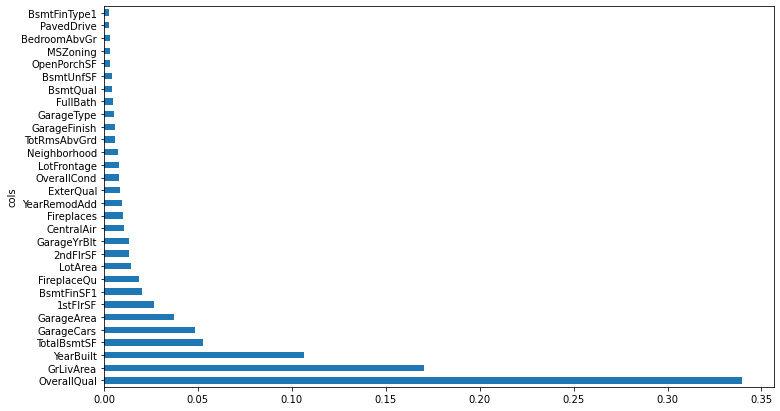

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [ ]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

22

In [ ]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [ ]:
m = rf(xs_imp, y)

In [ ]:
mean_squared_error(y, m.predict(xs_imp), squared=False)

0.1063900779416548

In [ ]:
mean_squared_error(valid_y, m.predict(valid_xs_imp), squared=False)

0.13291176936850171

In [ ]:
len(xs.columns), len(xs_imp.columns)

(82, 22)

In [ ]:
to_test = TabularPandas(test_df, procs, cat, cont)

In [ ]:
x_test = to_test.xs

In [ ]:
x_test = x_test[to_keep]

In [ ]:
test_pred = m.predict(x_test)

In [ ]:
test_pred = m.predict(x_test)
submission = pd.DataFrame()
submission['Id'] = np.array(test_df.index)
submission['SalePrice'] = test_pred
submission['SalePrice'] = np.expm1(test_pred)

In [ ]:
submission['SalePrice'] = np.expm1(test_pred)

In [ ]:
np.expm1(test_pred)

array([129036.70541491, 150800.95262469, 180292.57372485, ..., 156020.62921501, 113811.39569829, 229433.03918097])

In [ ]:
submission

,Id,SalePrice
0,1461,128877.122939
1,1462,149807.763775
2,1463,182260.263196
3,1464,182650.472593
4,1465,182019.254655
...,...,...
1454,2915,84960.263520
1455,2916,89130.512281
1456,2917,166837.426776
1457,2918,119290.527793


In [ ]:
submission.to_csv('submission2.csv', index=False)

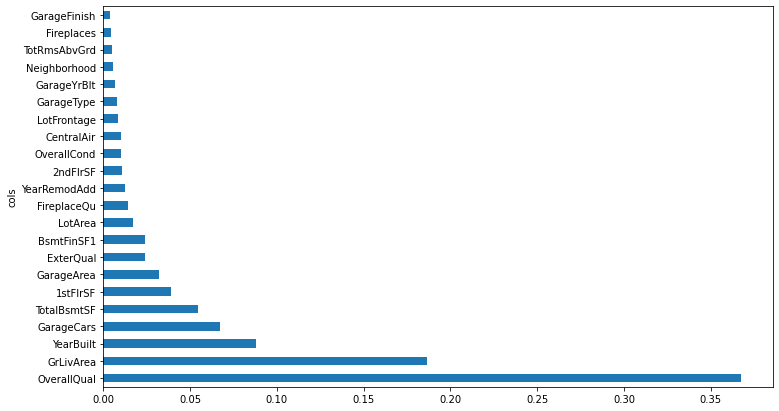

In [ ]:
plot_fi(rf_feat_importance(m, xs_imp));

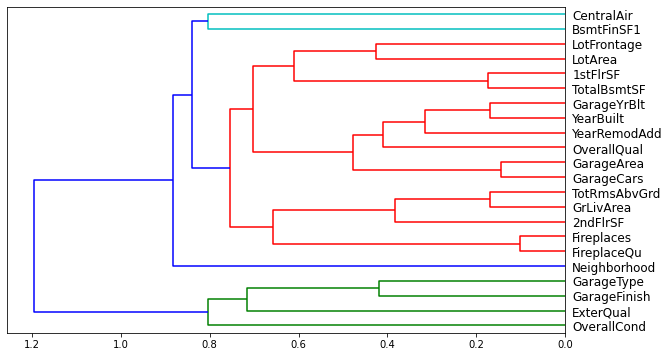

In [ ]:
cluster_columns(xs_imp)

In [ ]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=1168, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [ ]:
get_oob(xs_imp)

0.840005007271473

In [ ]:
xs_imp.columns

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageCars',
       'GarageArea', '1stFlrSF', 'BsmtFinSF1', 'FireplaceQu', 'LotArea',
       '2ndFlrSF', 'GarageYrBlt', 'CentralAir', 'Fireplaces', 'YearRemodAdd',
       'ExterQual', 'OverallCond', 'LotFrontage', 'Neighborhood',
       'TotRmsAbvGrd', 'GarageFinish', 'GarageType'],
      dtype='object')

In [ ]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in xs_imp.columns}

{'1stFlrSF': 0.8391677791344744,
 '2ndFlrSF': 0.83267382489206,
 'BsmtFinSF1': 0.8288167562343118,
 'CentralAir': 0.8452224542186819,
 'ExterQual': 0.836641302242429,
 'FireplaceQu': 0.8386893785273305,
 'Fireplaces': 0.8389416848605565,
 'GarageArea': 0.8383721350393082,
 'GarageCars': 0.8377801479071735,
 'GarageFinish': 0.8392235660471496,
 'GarageType': 0.8389947698054033,
 'GarageYrBlt': 0.8377539623581298,
 'GrLivArea': 0.8257276567113833,
 'LotArea': 0.8350864187950738,
 'LotFrontage': 0.8374329352326039,
 'Neighborhood': 0.8400230313800313,
 'OverallCond': 0.835663023823619,
 'OverallQual': 0.8291215364419373,
 'TotRmsAbvGrd': 0.8387766167402464,
 'TotalBsmtSF': 0.83290339752996,
 'YearBuilt': 0.8307724475594369,
 'YearRemodAdd': 0.839072955040638}

In [ ]:
to_drop = ['FireplaceQu','GarageCars','GarageYrBlt','1stFlrSF']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8327567937776512

In [ ]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [ ]:
save_pickle('xs_final.pkl', xs_final)
save_pickle('valid_xs_final.pkl', valid_xs_final)

In [ ]:
m = rf(xs_final, y)

In [ ]:
mean_squared_error(y, m.predict(xs_final), squared=False)

0.10448866208925531

In [ ]:
mean_squared_error(valid_y, m.predict(valid_xs_final), squared=False)

0.13375782720511967

In [ ]:
with open('./xs_final.pkl', 'rb') as f:
    xs_final = pickle.load(f)

with open('./valid_xs_final.pkl', 'rb') as f:
    valid_xs_final = pickle.load(f)

In [ ]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [ ]:
x_test_final = x_test.drop(to_drop, axis=1)
test_pred = m.predict(x_test_final)

In [ ]:
submission = pd.DataFrame()
submission['Id'] = np.array(x_test_final.index)
submission['SalePrice'] = test_pred
submission['SalePrice'] = np.expm1(test_pred)

In [ ]:
submission.to_csv('submission3.csv', index=False)

In [ ]:
dls = to.dataloaders(1024)

In [ ]:
y = to.train.y
y.min(),y.max()

(10.460270881652832, 13.53447437286377)

In [ ]:
learn = tabular_learner(dls, y_range=(10,14), layers=[128],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=tensor(0.0005))

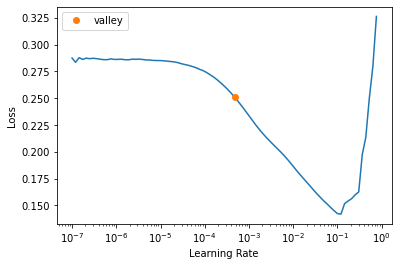

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 0.0005)

epoch,train_loss,valid_loss,time
0,0.285872,3.886535,00:00
1,0.287602,3.886237,00:00
2,0.273027,3.881581,00:00
3,0.258644,3.864085,00:00
4,0.245202,3.839390,00:00


In [ ]:
preds,targs = learn.get_preds()
mean_squared_error(targs, preds, squared=False)

1.959436

In [ ]:
## Attempt 2

In [ ]:
ls

data_description.txt   submission1.csv  test.csv            train_data_to3.pkl
kaggle.json            submission2.csv  train.csv           train_data_to.pkl
models/                submission3.csv  train_data_to1.pkl  valid_xs_final.pkl
sample_submission.csv  submission.csv   train_data_to2.pkl  xs_final.pkl


In [ ]:
df = pd.read_csv('train.csv', index_col='Id', low_memory=False)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,...,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,
1,60,RL,65.0,8450,...,2008,WD,Normal,208500
2,20,RL,80.0,9600,...,2007,WD,Normal,181500
3,60,RL,68.0,11250,...,2008,WD,Normal,223500
4,70,RL,60.0,9550,...,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,...,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,...,2007,WD,Normal,175000
1457,20,RL,85.0,13175,...,2010,WD,Normal,210000
1458,70,RL,66.0,9042,...,2010,WD,Normal,266500


In [ ]:
test_df = pd.read_csv('test.csv', index_col='Id', low_memory=False)
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,...,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,
1461,20,RH,80.0,11622,...,6,2010,WD,Normal
1462,20,RL,81.0,14267,...,6,2010,WD,Normal
1463,60,RL,74.0,13830,...,3,2010,WD,Normal
1464,60,RL,78.0,9978,...,6,2010,WD,Normal
1465,120,RL,43.0,5005,...,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,...,6,2006,WD,Normal
2916,160,RM,21.0,1894,...,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,...,9,2006,WD,Abnorml


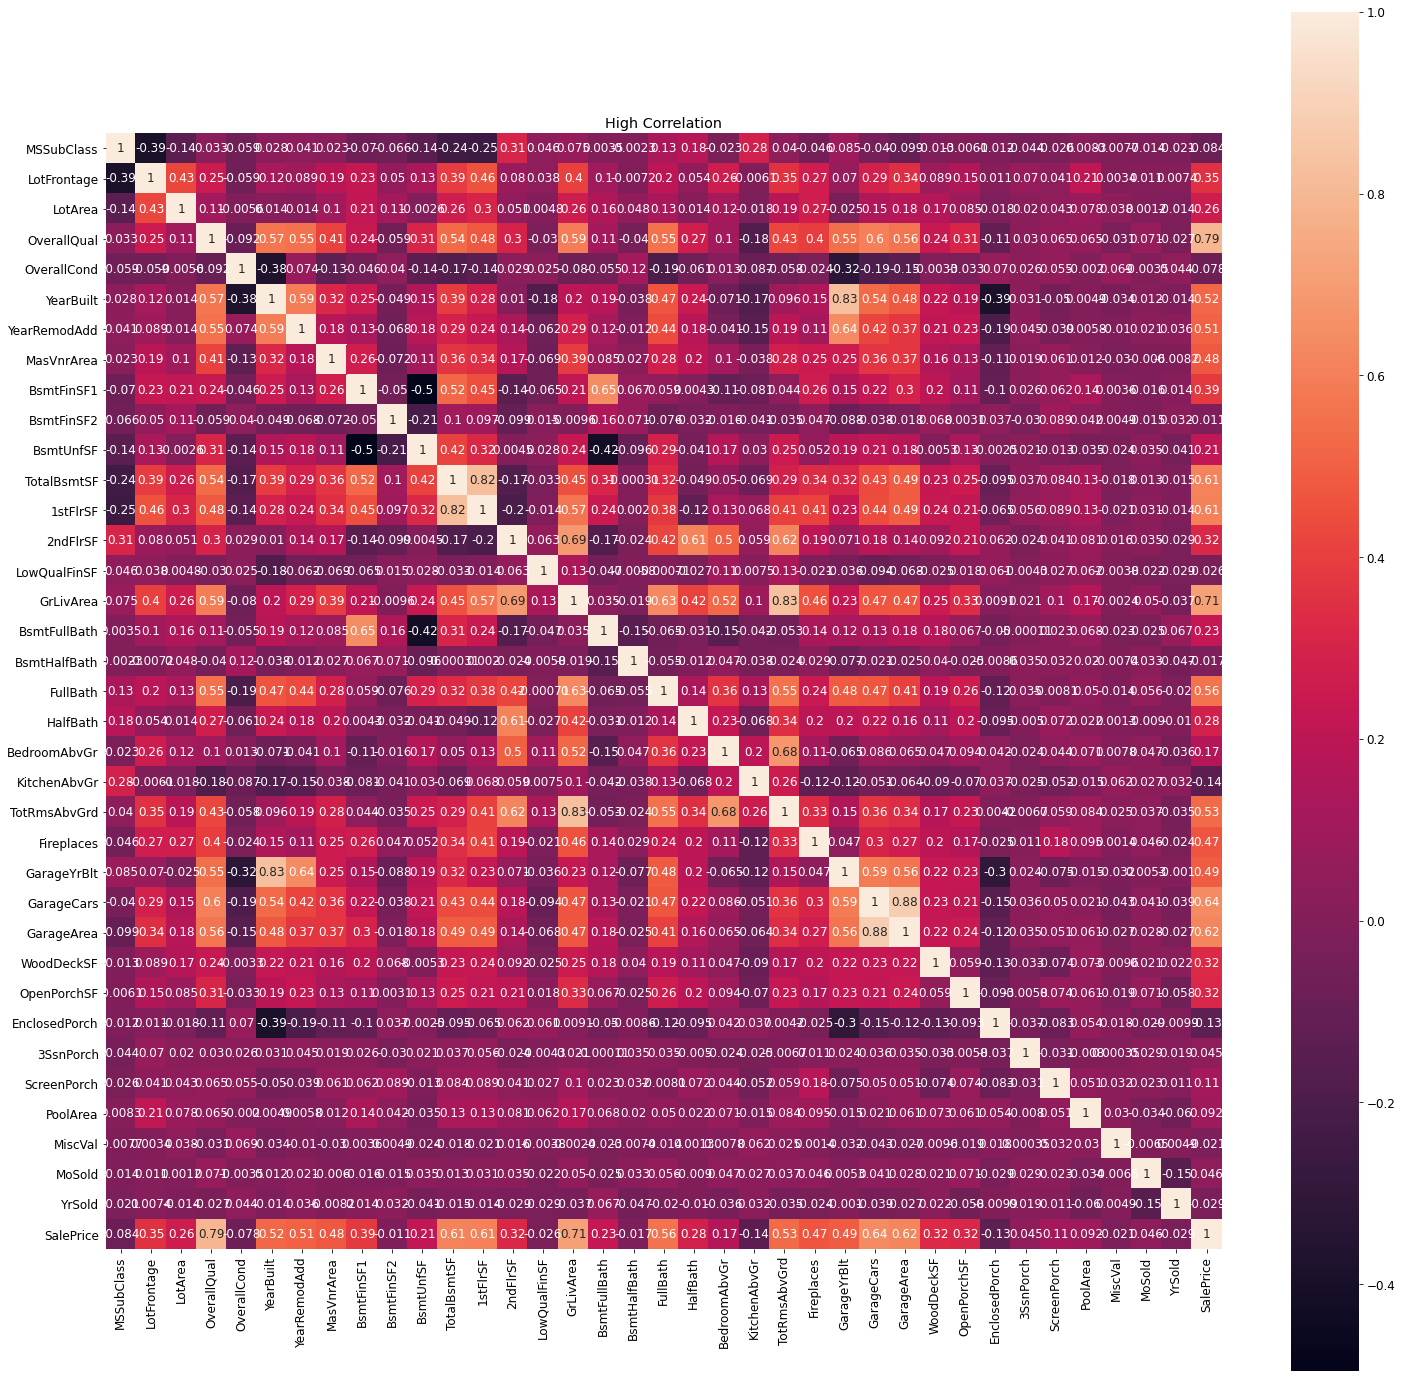

In [ ]:
num_correlation = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(25,25))
plt.title('High Correlation')
sns.heatmap(num_correlation, annot=True, square=True)

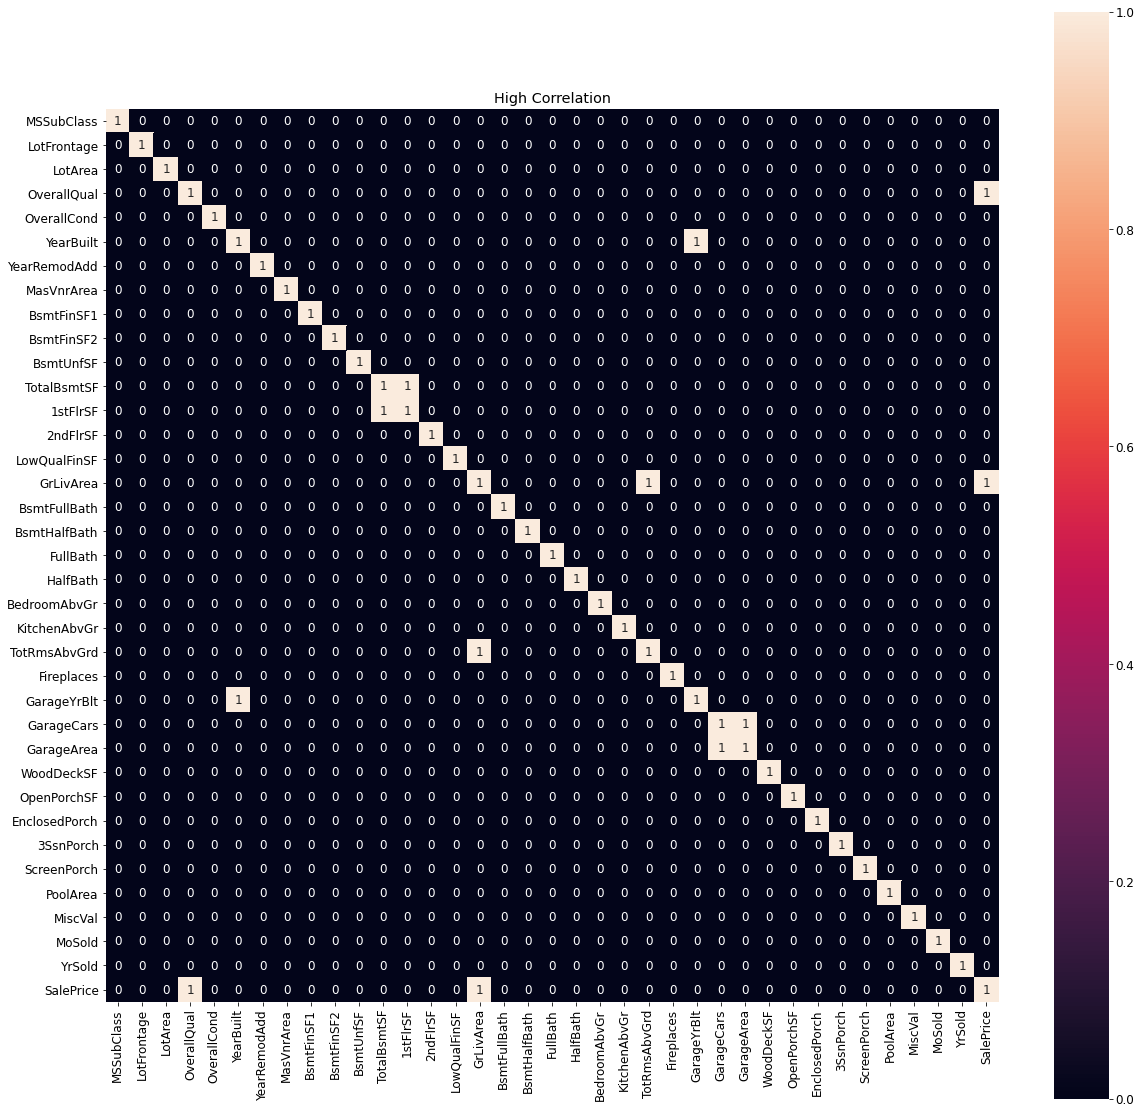

In [ ]:
num_correlation = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation >= 0.7, annot=True, square=True)

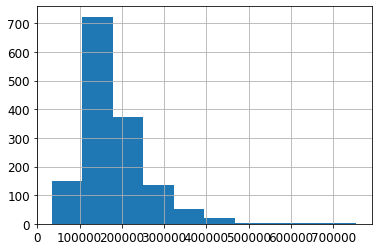

In [ ]:
df['SalePrice'].hist()

In [ ]:
df['SalePrice'] = np.log1p(df['SalePrice'])

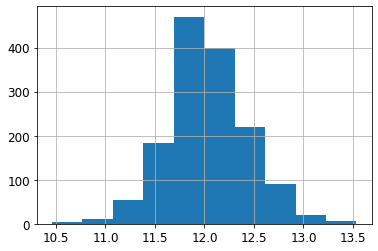

In [ ]:
df['SalePrice'].hist()

# Ordinal columns : natural ordering

# LotShape: General shape of property
Reg	Regular	
IR1	Slightly irregular
IR2	Moderately Irregular
IR3	Irregular

In [ ]:
df['LotShape'].unique()

['Reg', 'IR1', 'IR2', 'IR3']
Categories (4, object): ['Reg' < 'IR1' < 'IR2' < 'IR3']

In [ ]:
lotshape = 'Reg', 'IR1', 'IR2', 'IR3'

df['LotShape'] = df['LotShape'].astype('category')
df['LotShape'].cat.set_categories(lotshape, ordered=True, inplace=True)

* OverallQual: Rates the overall material and finish of the house
* OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [ ]:
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [ ]:
df['OverallQual'].dtype

dtype('int64')

In [ ]:
df['OverallCond'].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1])

In [ ]:
df['OverallCond'].dtype

dtype('int64')


* ExterQual: Evaluates the quality of the material on the exterior 
* ExterCond: Evaluates the present condition of the material on the exterior
* PoolQC: Pool quality
* KitchenQual: Kitchen quality
* HeatingQC: Heating quality and condition
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [ ]:
df['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
df['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [ ]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [ ]:
df['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
df['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [ ]:
qc = 'Ex', 'Gd', 'TA', 'Fa', 'Po'

In [ ]:
for i in ['ExterQual','ExterCond','PoolQC','KitchenQual','HeatingQC']:
  df[i] = df[i].astype('category')
  df[i].cat.set_categories(qc, ordered=True, inplace=True)
  print(df[i].unique())

['Gd', 'TA', 'Ex', 'Fa']
Categories (4, object): ['Ex' < 'Gd' < 'TA' < 'Fa']
['TA', 'Gd', 'Fa', 'Po', 'Ex']
Categories (5, object): ['Ex' < 'Gd' < 'TA' < 'Fa' < 'Po']
[NaN, 'Ex', 'Fa', 'Gd']
Categories (3, object): ['Ex' < 'Gd' < 'Fa']
['Gd', 'TA', 'Ex', 'Fa']
Categories (4, object): ['Ex' < 'Gd' < 'TA' < 'Fa']
['Ex', 'Gd', 'TA', 'Fa', 'Po']
Categories (5, object): ['Ex' < 'Gd' < 'TA' < 'Fa' < 'Po']


In [ ]:
dep_var = 'SalePrice'
procs = [Categorify, FillMissing]

cont, cat = cont_cat_split(df, 1, dep_var=dep_var)
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [ ]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [ ]:
len(to.train),len(to.valid)

(1168, 292)

In [ ]:
save_pickle('./train_data_to3.pkl',to)

# with open('./train_data_to3.pkl', 'rb') as f:
#     to = pickle.load(f)

In [ ]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [ ]:
def rf(xs, y, n_estimators=40, max_samples=1168, max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
m = rf(xs, y)

In [ ]:
# rmse
mean_squared_error(y, m.predict(xs), squared=False)

0.09944732328179724

In [ ]:
mean_squared_error(valid_y, m.predict(valid_xs), squared=False)

0.13051713319683045

In [ ]:
procs = [Categorify, FillMissing]
cont_test, cat_test = cont_cat_split(test_df)

In [ ]:
lotshape = 'Reg', 'IR1', 'IR2', 'IR3'

test_df['LotShape'] = test_df['LotShape'].astype('category')
test_df['LotShape'].cat.set_categories(lotshape, ordered=True, inplace=True)

In [ ]:
for i in ['ExterQual','ExterCond','PoolQC','KitchenQual','HeatingQC']:
  test_df[i] = test_df[i].astype('category')
  test_df[i].cat.set_categories(qc, ordered=True, inplace=True)
  print(test_df[i].unique())

['TA', 'Gd', 'Ex', 'Fa']
Categories (4, object): ['Ex' < 'Gd' < 'TA' < 'Fa']
['TA', 'Gd', 'Fa', 'Po', 'Ex']
Categories (5, object): ['Ex' < 'Gd' < 'TA' < 'Fa' < 'Po']
[NaN, 'Ex', 'Gd']
Categories (2, object): ['Ex' < 'Gd']
['TA', 'Gd', 'Ex', 'Fa', NaN]
Categories (4, object): ['Ex' < 'Gd' < 'TA' < 'Fa']
['TA', 'Gd', 'Ex', 'Fa', 'Po']
Categories (5, object): ['Ex' < 'Gd' < 'TA' < 'Fa' < 'Po']


In [ ]:
m.n_features_

82

In [ ]:
to_test = TabularPandas(test_df, procs, cat_test, cont_test)

In [ ]:
x_test = to_test.xs
x_test

,MSSubClass,MSZoning,Street,Alley,...,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
Id,,,,,,,,,
1461,1,3,2,0,...,0,0,120,0
1462,1,4,2,0,...,36,0,0,12500
1463,6,4,2,0,...,34,0,0,0
1464,6,4,2,0,...,36,0,0,0
1465,12,4,2,0,...,82,0,144,0
...,...,...,...,...,...,...,...,...,...
2915,14,5,2,0,...,0,0,0,0
2916,14,5,2,0,...,24,0,0,0
2917,1,4,2,0,...,0,0,0,0


In [ ]:
test_pred = m.predict(x_test)

submission = pd.DataFrame()
submission['Id'] = np.array(test_df.index)
submission['SalePrice'] = np.expm1(test_pred)

submission.to_csv('submission_4.csv', index=False)

ValueError: ignored

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
49,OverallQual,0.315554
61,GrLivArea,0.108824
18,ExterQual,0.075453
51,YearBuilt,0.074258
30,KitchenQual,0.056095
71,GarageCars,0.055284
72,GarageArea,0.041442
57,TotalBsmtSF,0.039389
58,1stFlrSF,0.033201
54,BsmtFinSF1,0.022699


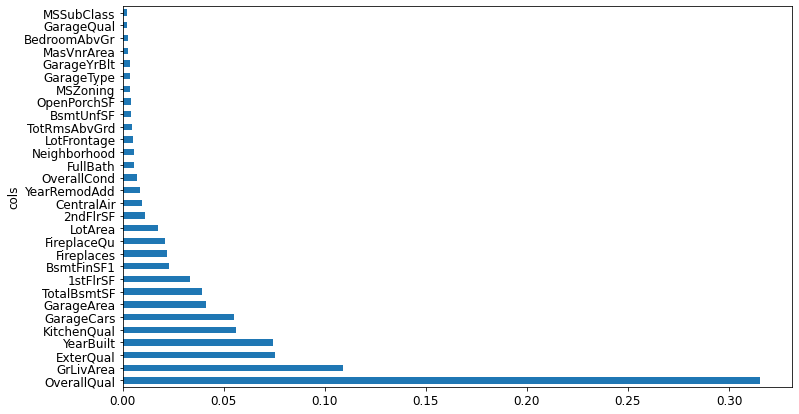

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [ ]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

20

In [ ]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [ ]:
m = rf(xs_imp, y)

In [ ]:
# rmse
mean_squared_error(y, m.predict(xs_imp), squared=False)

0.10447684211786433

In [ ]:
mean_squared_error(valid_y, m.predict(valid_xs_imp), squared=False)

0.13031700860639736

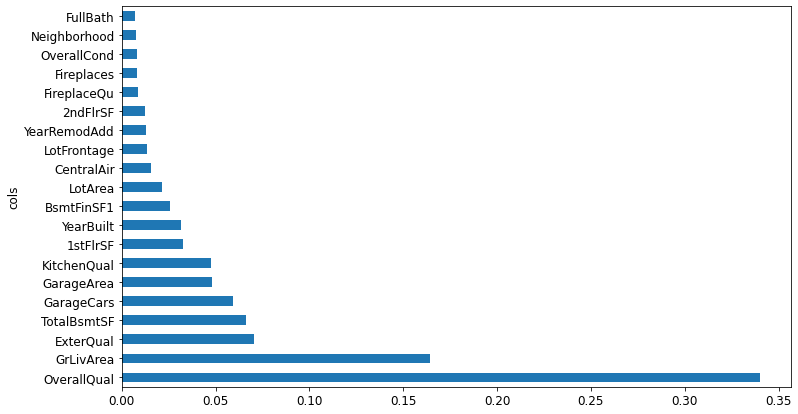

In [ ]:
plot_fi(rf_feat_importance(m, xs_imp));

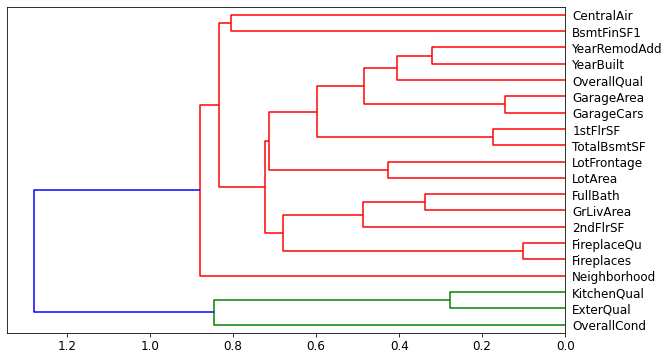

In [ ]:
cluster_columns(xs_imp)

In [ ]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=1168, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [ ]:
get_oob(xs_imp)

0.8416889849592977

In [ ]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in xs_imp.columns}

{'1stFlrSF': 0.8422058587475106,
 '2ndFlrSF': 0.8366928841447507,
 'BsmtFinSF1': 0.8370509101096327,
 'CentralAir': 0.8373152146489629,
 'ExterQual': 0.8380151233044941,
 'FireplaceQu': 0.8342818409672814,
 'Fireplaces': 0.8393920543774797,
 'FullBath': 0.8393095625540026,
 'GarageArea': 0.8453351000633383,
 'GarageCars': 0.8364490822170778,
 'GrLivArea': 0.8248951700815599,
 'KitchenQual': 0.8355704937196928,
 'LotArea': 0.8375238920562476,
 'LotFrontage': 0.8381650895196311,
 'Neighborhood': 0.8392104355775438,
 'OverallCond': 0.8379754690868917,
 'OverallQual': 0.8188323624921539,
 'TotalBsmtSF': 0.8385290527923662,
 'YearBuilt': 0.8387901641920767,
 'YearRemodAdd': 0.83672001159883}

In [ ]:
to_drop = ['GarageCars', 'TotalBsmtSF','FireplaceQu','LotFrontage','KitchenQual','FullBath']
get_oob(xs_imp.drop(to_drop, axis=1))

0.834906281187491

In [ ]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [ ]:
save_pickle('./xs_final4.pkl', xs_final)
save_pickle('./valid_xs_final4.pkl', valid_xs_final)

In [ ]:
m = rf(xs_final, y)

In [ ]:
# rmse
mean_squared_error(y, m.predict(xs_final), squared=False)

0.10637536188775487

In [ ]:
mean_squared_error(valid_y, m.predict(valid_xs_final), squared=False)

0.12846692045021288

In [ ]:
# import pickle

# Model_file = 'rf.pkl'

# pickle.dump(m, open(Model_file, 'wb'))

In [ ]:
# loaded_model = pickle.load(open(Model_file, 'rb'))